#Pulling ASINs

In [4]:
#pulling ASINs

import pickle
import json
import pandas as pd
import numpy as np 

from google.colab import drive
drive.mount('/content/drive')

##this assigns the filename we're trying to load into a string variable
path = 'drive/My Drive/Colab Notebooks/Topic Modeling project/1meta_Clothing_Shoes_and_Jewelry.json'
loadedjson = open(path, 'r') ## Not sure why u need 'r' but you do

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from time import sleep 
#set counter to see how many products are in the json
count = 0

#load the json file
#always have to initiate dictionaries befor we can use them
allproducts = {}

#each line of data is a product and its metadata
for aline in loadedjson:
  #creating a counter to now output progress in processing the entrie catalog
  count += 1
  if count % 100000 == 0: #### % is 'when devided by'. only print when it reaches a new milestone of 100000 ####
    #were only going to print our count every 100k, this way we dont spam our output console this is a way of checking the progress of loading the json
    print(count)
  
  aproduct = eval(aline) #eval is reading the json line to a readable string in python

    #making a dictionary entry with the ASIN (product ID) of the product as the key and its metadata as nested dictionaries
  allproducts[aproduct['asin']] = aproduct 

100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000


In [6]:
len(allproducts)

1503384

In [7]:
## Explooring the product data
#create a dictionary of all the product subcatagories 

allcategories = {}
count = 0

for aproduct in allproducts:  ## for each line in the dictionary that we just created
  #creating a counter to know our progress is processing the entrie catalog
  count += 1
  if count % 100000 == 0:
    print(count/1503384)   #Total number of rows in the data (len(allproducts))
    #setting up a dict with just one product, so we can inspect and refer to it
    aproduct = allproducts[aproduct]
    #creating a dict entry for each product catagory 
    #also counting the occurances of each category
    if 'categories' in aproduct:
      for categories in aproduct['categories']:
        for acategory in categories:
          if acategory in allcategories:
            allcategories[acategory] += 1
          if acategory not in allcategories:
            allcategories[acategory] = 1

0.06651660520532346
0.13303321041064692
0.19954981561597038
0.26606642082129384
0.33258302602661727
0.39909963123194075
0.4656162364372642
0.5321328416425877
0.5986494468479111
0.6651660520532345
0.7316826572585581
0.7981992624638815
0.8647158676692049
0.9312324728745284
0.9977490780798518


In [8]:
#now use the variable Expolorer in Spyder to locate a brand:
#>>allcategories['Nike']
#>> 8327
#>>allcategories['adidas']
#>> 8645

#recomended 1.5k products

sortedlist = []
for acategory in allcategories:
  sortedlist.append((allcategories[acategory],acategory))

sortedlist = sorted(sortedlist, reverse=True)

for item in range(0,50):
  print(sortedlist[item])

(27, 'Clothing, Shoes & Jewelry')
(9, 'Women')
(8, 'Clothing')
(7, 'Men')
(4, 'Novelty, Costumes & More')
(4, 'Jewelry')
(3, 'Shoes')
(3, 'Novelty')
(2, 'Sports & Outdoors')
(2, 'Shoes & Accessories: International Shipping Available')
(2, 'Briefs')
(2, 'Boys')
(2, 'Baby Girls')
(2, 'Baby')
(1, 'Wrist Watches')
(1, 'Watches')
(1, 'Underwear')
(1, 'Swimwear')
(1, 'Swimsuits & Cover Ups')
(1, 'Swimming')
(1, 'Swim')
(1, 'Speedo')
(1, 'Socks')
(1, 'Sneakers')
(1, 'S')
(1, 'Rain Footwear')
(1, 'Rain')
(1, 'Pants')
(1, 'Outdoor & Work')
(1, 'Outdoor')
(1, 'Kids & Baby')
(1, 'Hoodies & Active')
(1, 'Handbags & Wallets')
(1, 'Girls')
(1, 'Fashion Watches')
(1, 'Earrings')
(1, 'Dresses')
(1, 'Cuff Links')
(1, 'Costumes & Accessories')
(1, 'Costumes')
(1, 'Clutches')
(1, 'Chooka')
(1, 'Charms')
(1, 'Casual')
(1, 'C')
(1, 'Boxer Briefs')
(1, 'Bottoms')
(1, 'Boots')
(1, 'Boot Shop')
(1, 'Boating & Water Sports')


In [9]:
# we choose a set here because we dont want duplicates
allpatagoniaasins = set()
count = 0

for areview in allproducts:
  thereview = allproducts[areview]
  count += 1
  if count % 10000 == 0:
    print(count/1503384)


  #lets itterate through each catagory for a product. any product can be assigned many catagories
  for categories in thereview['categories']:
    #each catagory is encoded as a list. need to iterate one more time
    for acategory in categories:
      #check to see if the product catagory matches patagonia, lowercase the catagory string incase caps gets confused
      if 'patagonia' in acategory.lower():
        #store it to our set of patagonia ASINs
        allpatagoniaasins.add(thereview['asin'])

print(len(allpatagoniaasins)) 

0.006651660520532346
0.013303321041064691
0.019954981561597036
0.026606642082129383
0.03325830260266173
0.03990996312319407
0.04656162364372642
0.053213284164258766
0.05986494468479111
0.06651660520532346
0.0731682657258558
0.07981992624638815
0.08647158676692049
0.09312324728745285
0.09977490780798519
0.10642656832851753
0.11307822884904987
0.11972988936958222
0.12638154989011458
0.13303321041064692
0.13968487093117926
0.1463365314517116
0.15298819197224395
0.1596398524927763
0.16629151301330863
0.17294317353384098
0.17959483405437332
0.1862464945749057
0.19289815509543803
0.19954981561597038
0.20620147613650272
0.21285313665703506
0.2195047971775674
0.22615645769809975
0.2328081182186321
0.23945977873916444
0.24611143925969678
0.25276309978022915
0.2594147603007615
0.26606642082129384
0.2727180813418262
0.2793697418623585
0.28602140238289087
0.2926730629034232
0.29932472342395555
0.3059763839444879
0.31262804446502024
0.3192797049855526
0.3259313655060849
0.33258302602661727
0.339234

In [0]:
#write the asins to a file 
outputfile = open('drive/My Drive/Colab Notebooks/Topic Modeling project/1allasins.txt', 'w')

outputfile.write(','.join(allpatagoniaasins))
outputfile.close()

#Extracting the Patagonia reciews

In [0]:
##this assigns the filename we're trying to load into a string variable
path = 'drive/My Drive/Colab Notebooks/Topic Modeling project/1reviews_Clothing_Shoes_and_Jewelry.json'
loadedjson = open(path, 'r') ## Not sure why u need 'r' but you do

In [12]:
#parsing the review data

count = 0 
allreviews = {}
for aline in loadedjson:
  count += 1
  if count % 10000 == 0:
    print(count)
  areview = eval(aline)
  #I am using the itteration count as the key for the dictionary but dont have to do this
  allreviews[count] = areview

#how many unique reviews do we have 

print(len(allreviews))

10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000
210000
220000
230000
240000
250000
260000
270000
280000
290000
300000
310000
320000
330000
340000
350000
360000
370000
380000
390000
400000
410000
420000
430000
440000
450000
460000
470000
480000
490000
500000
510000
520000
530000
540000
550000
560000
570000
580000
590000
600000
610000
620000
630000
640000
650000
660000
670000
680000
690000
700000
710000
720000
730000
740000
750000
760000
770000
780000
790000
800000
810000
820000
830000
840000
850000
860000
870000
880000
890000
900000
910000
920000
930000
940000
950000
960000
970000
980000
990000
1000000
1010000
1020000
1030000
1040000
1050000
1060000
1070000
1080000
1090000
1100000
1110000
1120000
1130000
1140000
1150000
1160000
1170000
1180000
1190000
1200000
1210000
1220000
1230000
1240000
1250000
1260000
1270000
1280000
1290000
1300000
1310000
1320000
1330000
1340000
1350000
1360000
1370000
1380000
1390

In [13]:
from time import sleep
# now we need to go through all the reviews and pick out the reviews that correspond to our brand

allpatagoniaasins = []

for data in open('drive/My Drive/Colab Notebooks/Topic Modeling project/1allasins.txt', 'r'):
  asins = data.split(',')
  for anasin in asins:
    allpatagoniaasins.append(anasin)
print(allpatagoniaasins)

['B00A46HDT6', 'B0048EKAEA', 'B0048EK7IO', 'B006WFD8VK', 'B005681GW2', 'B00AYJ673Q', 'B005CQAQ0Q', 'B00A46HCAQ', 'B003M9M77A', 'B004Q78USM', 'B0030BFZD8', 'B00AY8ZUO4', 'B003A402I8', 'B00AAXPKXO', 'B000ME5VSK', 'B002HU59TI', 'B003X7EDZK', 'B004I9T8QG', 'B002S17OJO', 'B006WFD3OM', 'B0059DH8YE', 'B002TUTWHG', 'B003TNNPNY', 'B008FT7M5E', 'B00378LPD8', 'B0055GCXNG', 'B00A46H9XQ', 'B0018YAH0U', 'B0034OFMV6', 'B0059DGZ8O', 'B001DINU0K', 'B00AYJ8GM6', 'B004HTUQZY', 'B00AY904TY', 'B005CS3YO4', 'B006WEGVX8', 'B004I5NVRM', 'B0058Z8X88', 'B00AY8ZQR0', 'B0030BFZA6', 'B004KL0JBU', 'B0048EK5YA', 'B004OA61SC', 'B006WOQ70K', 'B00AY8ZPDU', 'B0048EK8DI', 'B004LHSB7W', 'B00A38ZN2Y', 'B00AY8WUCY', 'B003WF98JO', 'B005CQAN3G', 'B004HKI8GC', 'B004O6MYQE', 'B005CRJV4C', 'B004OA5ZQQ', 'B0058Z5CNM', 'B005CRZV32', 'B0058Z3CSY', 'B00AYJ979W', 'B008FSH0PM', 'B00HEQWSJE', 'B008R4S39Q', 'B0058EHXV2', 'B00686IM82', 'B0032MQG6U', 'B00190KZ0U', 'B005CSCYE0', 'B00AYJ7Y7E', 'B00378LRAE', 'B004I9DUTC', 'B005CQVHBI', 'B00A

In [14]:
patagoniareviews = {}
count = 0
for areview in allreviews:
  count += 1
  if count % 10000 == 0:
    print(count/1548920)
    #setting current review as a dictionary, so we can easily reference its entries
  thereview = allreviews[areview]
#  print(thereview.keys())
#  sleep(30)
  theasin = thereview['asin']
  reviewerid = thereview['reviewerID']
  if theasin in allpatagoniaasins:
    #setting the key here as something unique if we just did by asin we would only have one review for each asin
    thekey = '%s.%s' % (theasin, reviewerid)  #This is creating a unique identifyer with the asin# and the reviewerid. (%s(theasin).%s(reviewerid)) - PLACE HOLDERS
    patagoniareviews[thekey] = thereview

#thats it! all patagonia reviews are stored in patagoniareviews
#how many reviews do we have for patagonia
#print(len(patagoniareviews))

#save our data as a JSON dictionary Always need to specify the location path 
json.dump(patagoniareviews, open('drive/My Drive/Colab Notebooks/Topic Modeling project/allpatagoniareviews.json', 'w'))

#to reload:
#allpatagoniareviews = json.load(open('drive/My Drive/Colab Notebooks/Topic Modeling project/allpatagoniareviews.json', 'r'))

0.0064561113550086514
0.012912222710017303
0.019368334065025954
0.025824445420034606
0.032280556775043254
0.03873666813005191
0.04519277948506056
0.05164889084006921
0.05810500219507786
0.06456111355008651
0.07101722490509517
0.07747333626010382
0.08392944761511247
0.09038555897012111
0.09684167032512976
0.10329778168013842
0.10975389303514707
0.11621000439015572
0.12266611574516437
0.12912222710017301
0.13557833845518166
0.14203444981019034
0.148490561165199
0.15494667252020763
0.16140278387521628
0.16785889523022493
0.17431500658523358
0.18077111794024223
0.18722722929525087
0.19368334065025952
0.2001394520052682
0.20659556336027685
0.2130516747152855
0.21950778607029414
0.2259638974253028
0.23242000878031144
0.23887612013532009
0.24533223149032873
0.2517883428453374
0.25824445420034603
0.2647005655553547
0.2711566769103633
0.277612788265372
0.2840688996203807
0.2905250109753893
0.296981122330398
0.3034372336854066
0.30989334504041527
0.3163494563954239
0.32280556775043256
0.32926167

In [15]:
print(len(patagoniareviews))

1554


#Loading the reviews into a corpus

In [16]:
!pip install tmtoolkit

import json
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data]   Package wordnet is already up-to-date!


In [17]:
import random
random.seed(20191120) # make sampling reproduceable

import pandas as pd
import numpy as np
np.set_printoptions(precision=5)

from tmtoolkit.corpus import Corpus
import codecs
import csv
# load in the json file
allpatagoniareviews = pd.read_json('drive/My Drive/Colab Notebooks/Topic Modeling project/allpatagoniareviews.json', orient = 'index')
# convert to a csv
patreviews = allpatagoniareviews.to_csv('drive/My Drive/Colab Notebooks/Topic Modeling project/allpatagoniareviews.csv', index = None)
# read in the csv
patreviews = pd.read_csv('drive/My Drive/Colab Notebooks/Topic Modeling project/allpatagoniareviews.csv')
#patreviews = open('drive/My Drive/Colab Notebooks/Topic Modeling project/allpatagoniareviews.csv')
#patreviews = csv.reader(patreviews)
patreviews

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000KWHFGA,"[1, 1]",5,"very slimming, love that stretch. I wish they ...","10 26, 2011",A1GAS9DL6T4ZS8,"Carolee ""Carole R""",so great looking,1319587200
1,B000ME5VSK,"[1, 2]",4,"I've got a lot of Mountain Hardwear gear, but ...","03 14, 2010",A3FH0AJRYA5IWP,Arson Montoya,Capilene,1268524800
2,B000ME5VSK,"[1, 1]",5,These boxer briefs are top notch. Capilene mak...,"04 10, 2009",A3K5CAC82XDNQ4,Out There,Comf,1239321600
3,B000UYAI6C,"[0, 0]",5,this patagonia bra is very good compared to ot...,"02 1, 2012",A1J5HLGE1X1ZLB,b,"not the best, but very very good for what it is..",1328054400
4,B000UYAI6C,"[1, 1]",5,I ordered this bra for my Hot Yoga classes and...,"09 21, 2011",A2PV1QNOX9OSTU,Amazon Customer,Very Comfortable,1316563200
...,...,...,...,...,...,...,...,...,...
1549,B00ETJ2PX8,"[0, 0]",5,"The Patagonia R2 jacket is a comfortable, warm...","06 4, 2014",A2TXR85WQLE32N,D. S. Thurlow,Just the thing to wear...,1401840000
1550,B00F8ICFMA,"[0, 0]",5,This shoe hugs the foot and the soft leather i...,"04 17, 2014",A2YRYD6TVGNGS1,T. Plant,light and comfortable,1397692800
1551,B00HEQWSJE,"[2, 2]",5,I adore this vest. My husband got it for me fo...,"02 18, 2014",A33TK3KORX2JCE,Lise,My favorite thing,1392681600
1552,B00IFEKZGM,"[0, 0]",5,I wear a fleece almost everyday from fall to s...,"02 13, 2014",AJ00LSRDKVFTV,Joe flar,great,1392249600


In [18]:
#lets look at the stars to get an over all sense of public perception
patreviews[patreviews["overall"] == 5 ]

#1036 out of 1554 5-star reviews
#that is overwhelming positive


,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
0,B000KWHFGA,"[1, 1]",5,"very slimming, love that stretch. I wish they ...","10 26, 2011",A1GAS9DL6T4ZS8,"Carolee ""Carole R""",so great looking,1319587200
2,B000ME5VSK,"[1, 1]",5,These boxer briefs are top notch. Capilene mak...,"04 10, 2009",A3K5CAC82XDNQ4,Out There,Comf,1239321600
3,B000UYAI6C,"[0, 0]",5,this patagonia bra is very good compared to ot...,"02 1, 2012",A1J5HLGE1X1ZLB,b,"not the best, but very very good for what it is..",1328054400
4,B000UYAI6C,"[1, 1]",5,I ordered this bra for my Hot Yoga classes and...,"09 21, 2011",A2PV1QNOX9OSTU,Amazon Customer,Very Comfortable,1316563200
5,B000UYAI6C,"[1, 1]",5,Patagonia mesh sports bras are great. I highl...,"03 12, 2011",A3GKTNNH526AC4,WaterGirl,These are the best,1299888000
...,...,...,...,...,...,...,...,...,...
1548,B00DQZ5A6K,"[0, 0]",5,After reading Yvon's book I've been turning to...,"05 5, 2014",A7FJW77MI35ON,Michael Krisher,Very comfortable shoe,1399248000
1549,B00ETJ2PX8,"[0, 0]",5,"The Patagonia R2 jacket is a comfortable, warm...","06 4, 2014",A2TXR85WQLE32N,D. S. Thurlow,Just the thing to wear...,1401840000
1550,B00F8ICFMA,"[0, 0]",5,This shoe hugs the foot and the soft leather i...,"04 17, 2014",A2YRYD6TVGNGS1,T. Plant,light and comfortable,1397692800
1551,B00HEQWSJE,"[2, 2]",5,I adore this vest. My husband got it for me fo...,"02 18, 2014",A33TK3KORX2JCE,Lise,My favorite thing,1392681600


In [19]:
#less than or equal to 3 stars
patreviews[patreviews["overall"] <= 3 ]

#only 234 3 or less stars. 
#going to make a topic model for both

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime
17,B0018Y52T6,"[12, 15]",1,This is one of my favorite shoes ever. Too bad...,"01 30, 2011",A1XXQ4EGTZ0RAN,K. Webb,Tragic design flaw,1296345600
19,B0018Y52T6,"[1, 1]",3,I have wide feet and these are still a little ...,"02 9, 2014",A27N4VDLFOMF1C,jesse b jensen,Good,1391904000
21,B0018Y52T6,"[0, 0]",3,First time buyer of Pantagonia footwear and wa...,"02 3, 2014",A28O4KBPSVS1LR,max,Thin sole,1391385600
35,B0018Y52T6,"[0, 1]",1,"If I'd spent $45 on this, may have been OK. B...","10 10, 2013",A3PZZO13U5K1RL,Nana S.,Dissapointment for the price,1381363200
56,B0018YALHO,"[0, 0]",3,"I am normally a 13. Unfortunately, when I got ...","09 18, 2012",A383PPSVXNB0NB,Leigh Fitzpatrick,Was not meant to be,1347926400
...,...,...,...,...,...,...,...,...,...
1536,B00DQYW280,"[0, 0]",3,Shoe was great unless you have wide feet EE or...,"03 28, 2014",A3V6FTFGOOZD95,mightymanny,Great Shoe,1395964800
1538,B00DQYW280,"[0, 0]",2,I had to give them to my son who wears a size ...,"04 14, 2014",AXTHPXFXY9HFE,ruth smith,Way to big,1397433600
1543,B00DQYYO7C,"[0, 1]",3,I purchased these because I typically trust th...,"05 1, 2014",A2RAJWHSVNF92R,mypenname2126,Okay but too Androgynous,1398902400
1544,B00DQYYO7C,"[0, 0]",2,they look comfortable but they are not. You fe...,"07 16, 2014",A30Q01QATKVO8M,Luka,too narow,1405468800


In [20]:
patreviews = open('drive/My Drive/Colab Notebooks/Topic Modeling project/allpatagoniareviews.csv')
patreviews = csv.reader(patreviews)
patreviews

In [0]:
#create an empty corpus to store our doccuments for all reviews
corpus = Corpus()
#text is the column that contains the review
text = 3
  
for i, line in enumerate(patreviews): #the last two lines are adding two variables to the corpus: i  and line where line is the line of text 
  #and i is the number of the itteration that we are on (creating an 'id'). could also use a counter. enumerate keeps track of the itteration
  corpus.add_doc(str(i), line[text])

In [22]:
print(len(corpus)) # num of documents
corpus.doc_labels # lables of documents
corpus['91'] # refering to the 91st document. Have to treat it like a str because of that last line of code in the block above

1555


'This jacket looks good, is light, crumbles up to fit into your purse, and most importantly, is WARM!  This is my go-to jacket now!'

#Begin Preprocessing

(array([905., 426., 134.,  38.,  27.,   8.,   7.,   3.,   3.,   4.]),
 array([   9. ,  298.9,  588.8,  878.7, 1168.6, 1458.5, 1748.4, 2038.3,
        2328.2, 2618.1, 2908. ]),
 <a list of 10 Patch objects>)

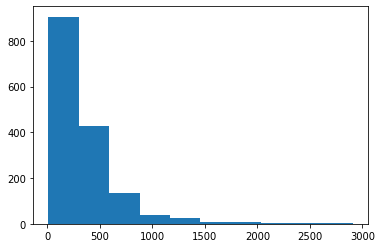

In [23]:
import matplotlib

matplotlib.pyplot.hist(corpus.doc_lengths.values()) #plots the character lengths of all of the docs. shows us that we do need to do some preprocessing

In [24]:
from tmtoolkit.preprocess import TMPreproc

preproc = TMPreproc(corpus)
preproc.pos_tag()       #goes through each doc and tags each word with a part of speach 
preproc.lemmatize()    #reduces the words so that they are more uniform -> characters -to- character reducing it to its core
preproc.tokens_to_lowercase() #removes uppercase 
preproc.remove_special_chars_in_tokens()   #removes punctuation
preproc.add_stopwords(['http', 'nt'])  #nt is often left behind after lemetization

<TMPreproc [1555 documents]>

In [25]:
preproc.vocabulary_size # number of unique tokens across all docs

5790

In [0]:
#preproc.stem() #truncates the words to their stem 

In [27]:
preproc.tokens_datatable 

,doc,position,token,meta_pos
0,0,0,reviewtext,NN
0,1,0,very,RB
1,1,1,slimming,JJ
2,1,2,,","
3,1,3,love,VB
...,...,...,...,...
83,999,83,,.
84,999,84,thank,NNP
85,999,85,you,PRP
86,999,86,patagonia,VBP


In [28]:
preproc_smaller = preproc.copy()
preproc_smaller.filter_for_pos('N') # filtering for nouns
preproc_smaller.clean_tokens(remove_numbers=True, remove_shorter_than=2)
preproc_smaller.remove_common_tokens(df_threshold=0.8)
#preproc_smaller.remove_uncommon_tokens(df_threshold=0.009)   # lowering the threshold, gives us more words, with more description

print(preproc.vocabulary_size)
print(preproc_smaller.vocabulary_size)

5790
3355


In [29]:
preproc_smaller.tokens_datatable # we can see that there are more specific tokens!

,doc,position,token,meta_pos
0,0,0,reviewtext,NN
0,1,0,stretch,NN
1,1,1,inch,NNS
2,1,2,pant,NNS
3,1,3,pant,NN
...,...,...,...,...
8,999,8,shoe,NN
9,999,9,box,NNS
10,999,10,craft,NN
11,999,11,storage,NN


In [30]:
# comparing the two preproc methods, making sure that the smaller one isnt too small
print(preproc.tokens['91'])
print(preproc_smaller.tokens['91'])
print(preproc.tokens['1'])
print(preproc_smaller.tokens['1'])
print(preproc.tokens['1000'])
print(preproc_smaller.tokens['1000'])

['this', 'jacket', 'look', 'good', '', 'be', 'light', '', 'crumble', 'up', 'to', 'fit', 'into', 'your', 'purse', '', 'and', 'most', 'importantly', '', 'be', 'warm', '', 'this', 'be', 'my', 'goto', 'jacket', 'now', '']
['jacket', 'purse', 'jacket']
['very', 'slimming', '', 'love', 'that', 'stretch', '', 'i', 'wish', 'they', 'be', '2', 'inch', 'longer', '', 'since', 'i', 'like', 'my', 'pant', 'to', 'be', 'very', 'long', 'be', '5', '', '2', '', 'this', 'be', 'a', 'pant', 'you', 'can', 'wear', 'for', 'casual', 'or', 'dress', '', 'they', 'be', 'awesome', 'look', 'and', 'so', 'very', 'snuggly', 'at', 'the', 'same', 'time', '', 'i', 'love', 'patagonia', 'clothes', '', 'it', 's', 'excellent', 'quality', '', 'and', 'amazon', 'have', 'the', 'best', 'price', 'for', 'these', 'everywhere', 'else', 'way', 'more', 'expensive', 'clothes', '']
['stretch', 'inch', 'pant', 'pant', 'dress', 'time', 'patagonia', 'clothes', 'quality', 'amazon', 'price', 'way', 'clothes']
['i', 'have', 'major', 'foot', 'pain

#Convert Preprocessing into a Document Term Matrix (DTM)

In [31]:
#doccument term matrix - each column is a token, each row represents a doccument\
doc_labels = np.array(preproc.doc_labels)
doc_labels[:10]

array(['0', '1', '10', '100', '1000', '1001', '1002', '1003', '1004',
       '1005'], dtype='<U4')

In [0]:
#separate the vocab from both preprocesses
vocab_bg = np.array(preproc.vocabulary)
vocab_sm = np.array(preproc_smaller.vocabulary)

In [33]:
#create the doccument term matricies
dtm_bg = preproc.dtm
dtm_sm = preproc_smaller.dtm
#this is what we are going to use when topic modeling!
dtm_bg, dtm_sm

(<1555x5790 sparse matrix of type '<class 'numpy.int32'>'
 	with 74182 stored elements in Compressed Sparse Row format>,
 <1555x3355 sparse matrix of type '<class 'numpy.int32'>'
 	with 17873 stored elements in Compressed Sparse Row format>)

#Creating the Topic Model

In [34]:
!pip install tmtoolkit['lda'] #lda is another algorythm that clusters like k means cluster
import logging
import warnings
from tmtoolkit.topicmod.tm_lda import compute_models_parallel # google this to get the doccumentation - this allows us to take multiple doc matricies and run different topic models sepperately so that we can compare

# supress the 'INFO' messages and warning from lda
logger = logging.getLogger('lda')
logger.addHandler(logging.NullHandler())
logger.propagate = False

warnings.filterwarnings('ignore')

# set data to use (make a dictionary)# these are the two different maticies that we will create and compare
dtms = {
    'bigger': dtm_bg,
    'smaller': dtm_sm
}

# and fixed hayperparameters # give the topic modle basic assumptions
lda_params = {
    'n_topics': 20, # the number of topics in the model: may need to change if topics are simmilar
    'eta': .05,   # beta parameter: granularity of the topic. lower the num higher the granularity and vis a vis - more specific words - at the cost of overlap
    'n_iter': 1000, # will not need to change this parameter or random_state: will change the other two
    'random_state': 20191122      #to make results reproducable
}

models = compute_models_parallel(dtms, constant_parameters=lda_params) # this computes the model- it needs the dict and the parameters

In [35]:
from tmtoolkit.topicmod.model_io import print_ldamodel_topic_words

model_sm = models['smaller'][0][1] #this is just pulling out the smaller set of topics from the models dict
print_ldamodel_topic_words(model_sm.topic_word_, vocab_sm, top_n=3)  # feed the parameters that you want
                          # small mod   #the vocab (earlier defined) # num of words per topic

                          #the higher the number, the more that word belongs to that topic (higher the relevance)
                          # if topics seem to be repeating themselve, we may need to change the sie of N in parameters
                          # in this case it seems that there are a lot of topics that surround shoes!

topic_1
> #1. shirt (0.062040)
> #2. patagonia (0.051862)
> #3. quality (0.035207)
topic_2
> #1. shoe (0.125371)
> #2. foot (0.099329)
> #3. summer (0.030966)
topic_3
> #1. time (0.044154)
> #2. patagonia (0.044154)
> #3. pant (0.034871)
topic_4
> #1. boot (0.106889)
> #2. size (0.032979)
> #3. foot (0.031372)
topic_5
> #1. patagonia (0.088777)
> #2. product (0.043359)
> #3. quality (0.038078)
topic_6
> #1. jacket (0.104684)
> #2. layer (0.032618)
> #3. patagonia (0.030111)
topic_7
> #1. shoe (0.213374)
> #2. pair (0.066503)
> #3. patagonia (0.046810)
topic_8
> #1. bag (0.110999)
> #2. strap (0.052027)
> #3. shoulder (0.020989)
topic_9
> #1. pocket (0.070420)
> #2. rain (0.029954)
> #3. thing (0.028194)
topic_10
> #1. shoe (0.142972)
> #2. foot (0.068238)
> #3. toe (0.057705)
topic_11
> #1. shoe (0.049921)
> #2. patagonia (0.036318)
> #3. material (0.034505)
topic_12
> #1. shoe (0.121466)
> #2. trail (0.049614)
> #3. sole (0.024466)
topic_13
> #1. fit (0.053437)
> #2. color (0.048988)


In [36]:
####  This is for the bigger model

model_bg = models['bigger'][0][1] #this is just pulling out the smaller set of topics from the models dict
print_ldamodel_topic_words(model_bg.topic_word_, vocab_bg, top_n=3)  # feed the parameters that you want
                          # big mod   #the vocab (earlier defined) # num of words per topic

                          #the higher the number, the more that word belongs to that topic (higher the relevance)
                          # if topics seem to be repeating themselve, we may need to change the sie of N in parameters
                          # it seems that the smaller model is more accurate and specific

topic_1
> #1.  (0.110475)
> #2. my (0.038105)
> #3. for (0.034931)
topic_2
> #1.  (0.127891)
> #2. and (0.054494)
> #3. in (0.034268)
topic_3
> #1.  (0.146114)
> #2. be (0.057906)
> #3. and (0.039438)
topic_4
> #1.  (0.353673)
> #2. 34 (0.060750)
> #3. clog (0.022349)
topic_5
> #1.  (0.065368)
> #2. and (0.035210)
> #3. in (0.033199)
topic_6
> #1.  (0.085289)
> #2. and (0.037371)
> #3. the (0.036366)
topic_7
> #1.  (0.126360)
> #2. it (0.065664)
> #3. i (0.061501)
topic_8
> #1.  (0.112314)
> #2. the (0.080703)
> #3. be (0.049092)
topic_9
> #1.  (0.097162)
> #2. i (0.065177)
> #3. be (0.035141)
topic_10
> #1.  (0.101829)
> #2. i (0.053982)
> #3. size (0.049434)
topic_11
> #1.  (0.098672)
> #2. it (0.046718)
> #3. the (0.042524)
topic_12
> #1.  (0.076589)
> #2. the (0.051014)
> #3. a (0.043021)
topic_13
> #1. you (0.109301)
> #2. to (0.039645)
> #3. if (0.033389)
topic_14
> #1.  (0.065862)
> #2. boot (0.060955)
> #3. the (0.056049)
topic_15
> #1. 5 (0.021544)
> #2. well (0.020911)
> #3. 

#Evaluation

In [37]:
const_params = {'n_iter': 1000, 'eta': 0.1, 'random_state': 20191122} # this is a sampling so we need the samples to be consistent random_state
ks = list(range(1, 302, 20)) #k is the number of topis which is a list of all the different topic k we want to look at (from 1, end 302, by 20) chek output
print(ks)
varying_params = [dict(n_topics = k, alpha = 1/10*k)for k in ks] # dictionary of parameters wrapped in a list, two keys: n_topics, and alpha. Creates this for each k in our ks list. check output
print(varying_params) # alpha is an expectation of how many topics expected to find in any given doc: 1/k = as we introduce more docs - we expect the ratio of more docs to decrease

[1, 21, 41, 61, 81, 101, 121, 141, 161, 181, 201, 221, 241, 261, 281, 301]
[{'n_topics': 1, 'alpha': 0.1}, {'n_topics': 21, 'alpha': 2.1}, {'n_topics': 41, 'alpha': 4.1000000000000005}, {'n_topics': 61, 'alpha': 6.1000000000000005}, {'n_topics': 81, 'alpha': 8.1}, {'n_topics': 101, 'alpha': 10.100000000000001}, {'n_topics': 121, 'alpha': 12.100000000000001}, {'n_topics': 141, 'alpha': 14.100000000000001}, {'n_topics': 161, 'alpha': 16.1}, {'n_topics': 181, 'alpha': 18.1}, {'n_topics': 201, 'alpha': 20.1}, {'n_topics': 221, 'alpha': 22.1}, {'n_topics': 241, 'alpha': 24.1}, {'n_topics': 261, 'alpha': 26.1}, {'n_topics': 281, 'alpha': 28.1}, {'n_topics': 301, 'alpha': 30.1}]


In [0]:
from tmtoolkit.topicmod import tm_lda
eval_results = tm_lda.evaluate_topic_models(dtm_sm, varying_params, const_params)

In [39]:
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results

results_by_n_topics = results_by_parameter(eval_results, 'n_topics') #get stats by number of topics 
print(results_by_n_topics)

[(1, {'cao_juan_2009': nan, 'arun_2010': 158.10323979598297, 'coherence_mimno_2011': -3.0410710750686807}), (21, {'cao_juan_2009': 0.043630298320955975, 'arun_2010': 52.88477825416565, 'coherence_mimno_2011': -11.311268550064261}), (41, {'cao_juan_2009': 0.12946675605921015, 'arun_2010': 47.24246948207494, 'coherence_mimno_2011': -12.835420758769256}), (61, {'cao_juan_2009': 0.1475583337924499, 'arun_2010': 44.44193663968578, 'coherence_mimno_2011': -13.041495852100047}), (81, {'cao_juan_2009': 0.16306996157039977, 'arun_2010': 43.2649808851188, 'coherence_mimno_2011': -13.452043335597306}), (101, {'cao_juan_2009': 0.17018900362740907, 'arun_2010': 41.66984165923678, 'coherence_mimno_2011': -13.69348858695251}), (121, {'cao_juan_2009': 0.1773624442705879, 'arun_2010': 40.373292591576266, 'coherence_mimno_2011': -14.446720216127341}), (141, {'cao_juan_2009': 0.1848581665593463, 'arun_2010': 39.834602168011344, 'coherence_mimno_2011': -14.942628667295637}), (161, {'cao_juan_2009': 0.1993

(<Figure size 576x432 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f3200efe470>,
       dtype=object))

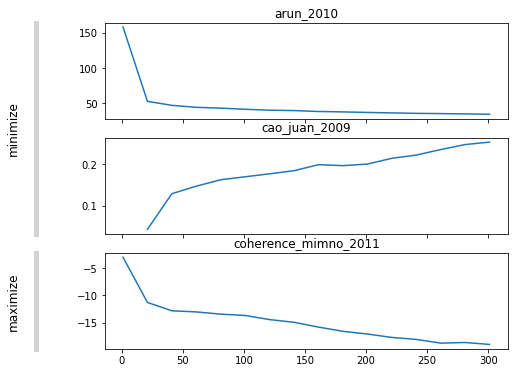

In [40]:
plot_eval_results(results_by_n_topics) ## this prints the elbows

# Topic Names and Classification

In [41]:
from tmtoolkit.topicmod.model_io import ldamodel_top_doc_topics
from tmtoolkit.bow.bow_stats import doc_lengths
from tmtoolkit.topicmod.model_stats import generate_topic_labels_from_top_words
print(model_sm)
doc_topic = model_sm.doc_topic_
doc_labels = np.array(preproc_smaller.doc_labels)
topic_words = model_sm.topic_word_

doc_lengths_sm = doc_lengths(dtm_sm)

print(len(doc_topic))
print(len(doc_lengths_sm))

#remove uncommon words
topic_labels = generate_topic_labels_from_top_words(
    topic_words,
    doc_topic,
    doc_lengths_sm,
    vocab_sm,
    lambda_ = 1,      # the lower the lambda the lower the ammount of words
)

documentclassification = ldamodel_top_doc_topics(doc_topic, doc_labels, top_n=2, topic_labels=topic_labels)

for index, arow in documentclassification.iterrows():
  documentclassification.set_value(index, 'text', corpus[index])

1555
1555


In [42]:
#this is a way we can check the results of our model without committing to it yet
print('Results:')
lookup = documentclassification[documentclassification['text'].str.contains('jacket')] #this is a fuzzy search for jacket reviews
print([lookup['text'].iloc[0], lookup['rank_1'].iloc[0]]) #printing the first match of the search for the text and the rank or classification

Results:
["I am not new to the Retro X jacket.  I purchased my first one back in 1999.  Thirteen years later, I am still impressed with this awesome jacket.  The good news is that I have really put this jacket to the test.  The better news is that it is everything I had hoped it would be and then some.Using this jacket on numerous winter cold weather expeditions in Alaska, Northern Rockies and even in the Canadian Arctic it has had ample opportunity to disappoint.  It has never dissapointed me.  In my line of work, I spend several weeks (3-5) at a time in the wilderness in cold climates, the last thing I want to be worrying about is staying warm.  This jacket has taken more abuse than most people will be able to dish out in a lifetime.  It still has many serviceable years in it.  I wear it as a mid-layer under my Gore-Tex shell and over my Patagonia expedition weight capilene, or on milder days 20's - 30's I simply use it without the Gore-Tex shell.  The jacket is more stiff than you w

In [43]:
#save classifications to an xls file
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
documentclassification.to_excel('drive/My Drive/Colab Notebooks/Topic Modeling project/patagonia_topic_classification2.xlsx')

Mounted at /content/drive
